In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

bline = {
    "ocaml" : 0.015, 
    "racket" : 0.047,
    "lua" : 0.121,
}
ocaml_stack_pd= pd.read_csv('../experiments/ocaml_stack_full_1b/results.csv')
rkt_stack_pd = pd.read_csv('../experiments/rkt_stack_full_1b/results.csv')
lua_stack_pd = pd.read_csv('../experiments/lua_stack_full_1b/results.csv')

lua_multiplt_pd = pd.read_csv('../experiments/lua_full_1b/results.csv')
rkt_multiplt_pd = pd.read_csv('../experiments/rkt_full_1b/results.csv')
ocaml_multiplt_pd = pd.read_csv('../experiments/ocaml_full_1b/results.csv')

# Read data
ocaml_stack = list(ocaml_stack_pd["Estimate"])
rkt_stack = list(rkt_stack_pd["Estimate"])
lua_stack = list(lua_stack_pd["Estimate"])

lua_multiplt = list(lua_multiplt_pd["Estimate"])
rkt_multiplt = list(rkt_multiplt_pd["Estimate"])
ocaml_multiplt = list(ocaml_multiplt_pd["Estimate"])

In [3]:
def percent_increase(base, new):
    return (new - base) / base * 100

print(percent_increase(max(ocaml_stack), max(ocaml_multiplt)))
print(percent_increase(max(rkt_stack), max(rkt_multiplt)))
print(percent_increase(max(lua_stack), max(lua_multiplt)))

print(percent_increase(bline["ocaml"], max(ocaml_multiplt)))
print(percent_increase(bline["racket"], max(rkt_multiplt)))
print(percent_increase(bline["lua"], max(lua_multiplt)))

print(percent_increase(bline["ocaml"], max(ocaml_stack)))
print(percent_increase(bline["racket"], max(rkt_stack)))
print(percent_increase(bline["lua"], max(lua_stack)))

print(max(ocaml_multiplt) - bline["ocaml"])
print(max(rkt_multiplt) - bline["racket"])
print(max(lua_multiplt) - bline["lua"])

print(max(ocaml_stack) - bline["ocaml"])
print(max(rkt_stack) - bline["racket"])
print(max(lua_stack) - bline["lua"])

129.45205479452036
162.58992805755406
35.27980535279804
615.8119658119654
141.17880269591637
42.703146655715784
211.965811965812
-8.15382582265106
5.487397977516531
0.0923717948717948
0.0663540372670807
0.051670807453416095
0.0317948717948718
-0.003832298136645998
0.0066397515527950035


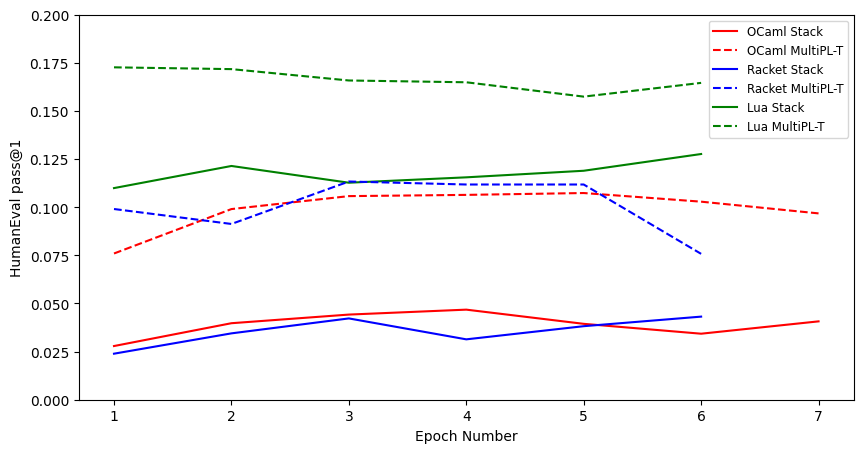

In [15]:
# Plot 1
plt.figure(figsize=(10, 5))
xpos = list(range(1,8))
plt.plot(xpos, ocaml_stack, label="OCaml Stack", color="red")
plt.plot(xpos, ocaml_multiplt, label="OCaml MultiPL-T", color="red", linestyle="--")
xpos = list(range(1,7))
plt.plot(xpos, rkt_stack, label="Racket Stack", color="blue")
plt.plot(xpos, lua_stack, label="Lua Stack", color="green")
plt.plot(xpos, rkt_multiplt, label="Racket MultiPL-T", color="blue", linestyle="--")
plt.plot(xpos, lua_multiplt, label="Lua MultiPL-T", color="green", linestyle="--")


# set x-axis 1-7
plt.xlabel("Epoch Number")
plt.ylabel("HumanEval pass@1")
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1, 2, 4, 3, 5]
ax = plt.gca()
ax.set_ylim(0, 0.2)
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
        fontsize=8.5)
plt.show()

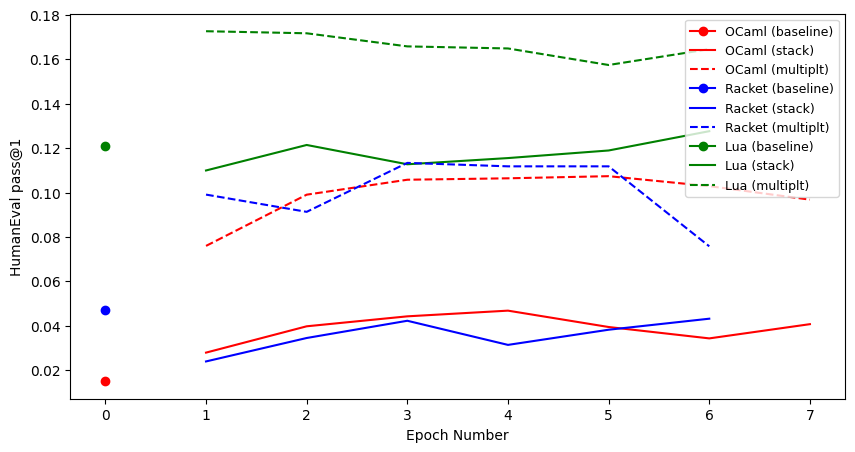

In [63]:
#baseline
plt.figure(figsize=(10, 5))
plt.plot([0], [bline["ocaml"]], label="OCaml (baseline)", color="red", marker="o")
plt.plot([0], [bline["racket"]], label="Racket (baseline)", color="blue", marker="o")
plt.plot([0], [bline["lua"]], label="Lua (baseline)", color="green", marker="o")

# Plot 2
xpos = list(range(1,8))
plt.plot(xpos, ocaml_stack, label="OCaml (stack)", color="red")
plt.plot(xpos, ocaml_multiplt, label="OCaml (multiplt)", color="red", linestyle="--")
xpos = list(range(1,7))
plt.plot(xpos, rkt_stack, label="Racket (stack)", color="blue")
plt.plot(xpos, lua_stack, label="Lua (stack)", color="green")
plt.plot(xpos, rkt_multiplt, label="Racket (multiplt)", color="blue", linestyle="--")
plt.plot(xpos, lua_multiplt, label="Lua (multiplt)", color="green", linestyle="--")


# set x-axis 1-7
plt.xlabel("Epoch Number")
plt.ylabel("HumanEval pass@1")
handles, labels = plt.gca().get_legend_handles_labels()
order = [0, 3, 4, 1, 5, 7, 2, 6, 8]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
        fontsize=9, loc="upper right")
plt.show()

['OCaml\nStack', 'OCaml\nMultiPL-T', 'Racket\nStack', 'Lua\nStack', 'Racket\nMultiPL-T', 'Lua\nMultiPL-T']


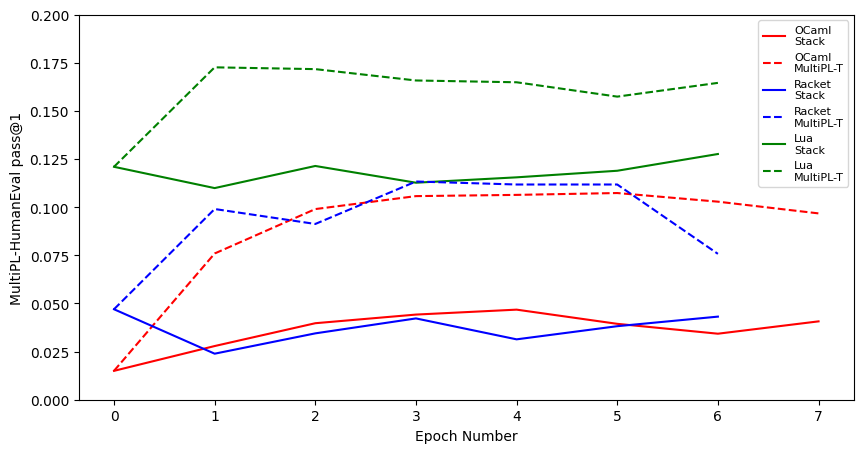

In [4]:
# Plot 3
plt.figure(figsize=(10, 5))
xpos = list(range(0,8))
plt.plot(xpos, [bline["ocaml"]]+ocaml_stack, label="OCaml\nStack", color="red")
plt.plot(xpos, [bline["ocaml"]]+ocaml_multiplt, label="OCaml\nMultiPL-T", color="red", linestyle="--")
xpos = list(range(0,7))
plt.plot(xpos, [bline["racket"]]+rkt_stack, label="Racket\nStack", color="blue")
plt.plot(xpos, [bline["lua"]]+lua_stack, label="Lua\nStack", color="green")
plt.plot(xpos, [bline["racket"]]+rkt_multiplt, label="Racket\nMultiPL-T", color="blue", linestyle="--")
plt.plot(xpos, [bline["lua"]]+lua_multiplt, label="Lua\nMultiPL-T", color="green", linestyle="--")


# set x-axis 1-7
ax = plt.gca()
ax.set_ylim(0, 0.2)
plt.xlabel("Epoch Number")
plt.ylabel("MultiPL-HumanEval pass@1")
handles, labels = plt.gca().get_legend_handles_labels()
print(labels)
order = [0,1, 2, 4, 3, 5]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
        fontsize=8, loc="upper right",ncol=1)


plt.savefig("compare_more_stack.pdf", bbox_inches='tight')

['OCaml\nStack', 'OCaml\nMultiPL-T', 'Racket\nStack', 'Lua\nStack', 'Racket\nMultiPL-T', 'Lua\nMultiPL-T']


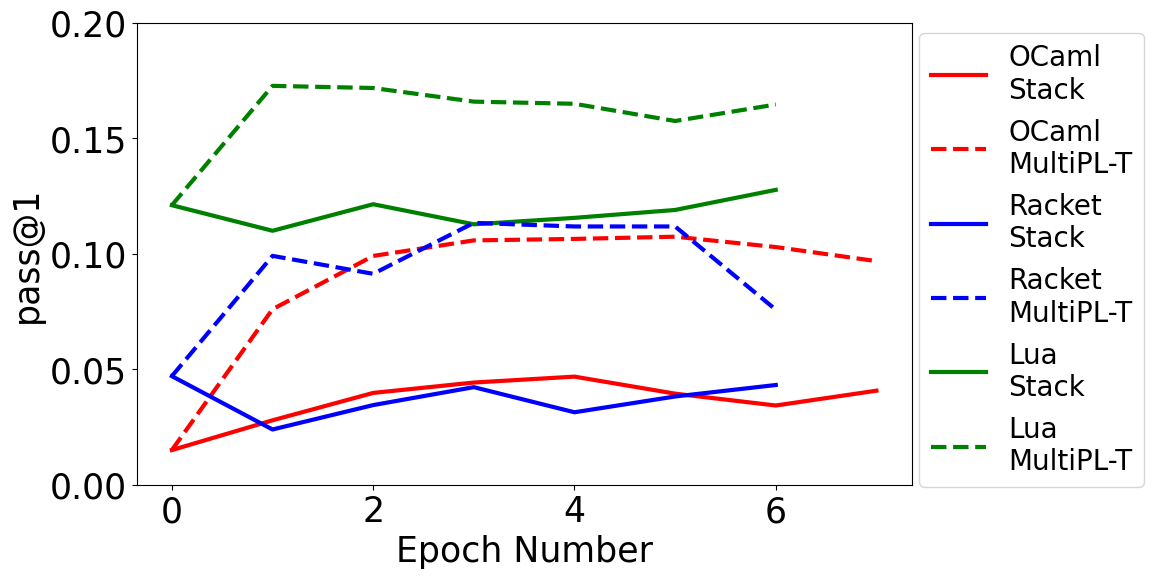

In [43]:
# Plot 3
plt.figure(figsize=(10, 6))
xpos = list(range(0,8))
n = 3
plt.plot(xpos, [bline["ocaml"]]+ocaml_stack, label="OCaml\nStack", color="red", linewidth=n)
plt.plot(xpos, [bline["ocaml"]]+ocaml_multiplt, label="OCaml\nMultiPL-T", color="red", linestyle="--", linewidth=n)
xpos = list(range(0,7))
plt.plot(xpos, [bline["racket"]]+rkt_stack, label="Racket\nStack", color="blue", linewidth=n)
plt.plot(xpos, [bline["lua"]]+lua_stack, label="Lua\nStack", color="green",linewidth=n)
plt.plot(xpos, [bline["racket"]]+rkt_multiplt, label="Racket\nMultiPL-T", color="blue", linestyle="--",linewidth=n)
plt.plot(xpos, [bline["lua"]]+lua_multiplt, label="Lua\nMultiPL-T", color="green", linestyle="--",linewidth=n)


# set x-axis 1-7
ax = plt.gca()
ax.set_ylim(0, 0.2)
plt.xlabel("Epoch Number")
plt.ylabel("pass@1")
handles, labels = plt.gca().get_legend_handles_labels()
print(labels)
order = [0,1, 2, 4, 3, 5]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
        fontsize=20, loc=[1.01,-0.004],ncol=1)

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 25}

import matplotlib
matplotlib.rc('font', **font)

plt.savefig("compare_more_stack.pdf", bbox_inches='tight')